# 2. Reconnaissance faciale

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import sklearn.svm
from matplotlib import pyplot as plt
from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60, data_home="./sk_learn_data")

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


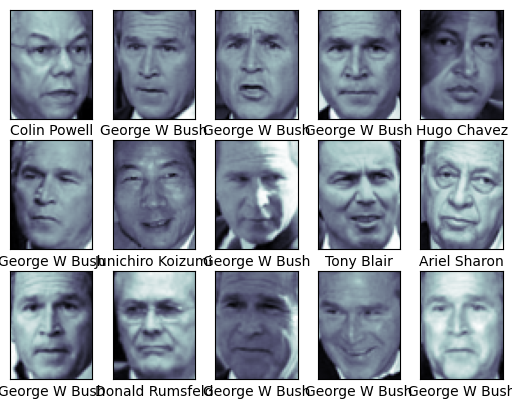

In [3]:
print(faces.target_names)
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
    xlabel=faces.target_names[faces.target[i]])

In [4]:
from sklearn.decomposition import PCA
# Réduction depuis dimension 2914 à dimension 150
pca = PCA(n_components=150, whiten=True, random_state=42)
X = pca.fit_transform(faces.data)

In [5]:
from sklearn.model_selection import train_test_split

# 20% du jeu de données servira a la vérification 
X_train, X_test, y_train, y_test = train_test_split(X, faces.target, random_state=42, test_size=0.2)

[3 4 3 6 6 1 7 3 3 1 3 3 0 3 2 1 3 3 1 2 7 7 5 5 0 3 6 7 3 3 0 6 3 3 3 3 2
 4 3 2 3 3 7 1 3 3 0 2 1 2 4 3 2 6 7 3 3 1 7 3 4 2 4 2 5 4 7 3 4 3 1 5 4 1
 3 1 0 4 3 3 3 3 1 1 3 3 3 2 7 2 1 1 2 7 7 7 7 3 3 5 3 7 1 5 3 2 0 3 7 0 3
 1 0 2 3 3 3 3 7 4 4 7 5 2 2 3 3 1 2 2 3 3 0 3 4 3 4 1 3 1 7 6 5 3 3 1 1 3
 5 4 3 3 1 1 7 1 3 0 1 4 6 1 2 3 2 3 1 7 2 2 1 7 3 3 1 1 1 3 3 1 0 4 1 1 7
 1 1 5 3 7 3 3 7 4 6 3 7 7 3 2 0 3 2 3 3 6 3 3 1 7 3 6 1 2 3 1 1 7 7 2 3 3
 4 7 7 2 3 7 5 7 1 3 3 7 4 4 7 3 1 1 3 4 3 1 4 3 1 1 5 1 2 3 4 1 3 1 2 2 3
 3 3 7 3 7 3 1 3 2 3 3] [3 4 3 6 6 1 3 3 3 1 3 3 0 3 3 1 7 2 3 2 7 3 5 5 0 3 6 7 3 3 0 6 3 3 2 3 2
 3 3 3 3 3 7 1 3 3 5 1 1 2 7 3 5 6 7 3 7 1 7 0 4 2 4 2 5 4 7 3 4 3 1 3 4 1
 3 5 0 4 3 3 3 3 1 0 3 2 3 2 7 1 1 3 2 7 3 1 7 3 3 3 3 7 3 4 3 3 0 3 7 3 3
 1 0 7 7 1 3 2 7 4 7 7 5 2 3 3 3 3 3 2 3 7 0 3 4 3 4 1 3 3 7 6 5 3 3 1 1 3
 5 4 3 2 1 1 7 1 3 7 1 4 6 1 1 3 2 3 1 7 0 2 1 7 1 3 1 1 1 3 3 1 1 4 1 1 7
 1 1 5 3 3 3 3 4 5 6 3 7 3 3 2 0 3 2 3 3 6 3 3 1 7 3 6 1 2 3 1 1 7 4 3 1 1
 

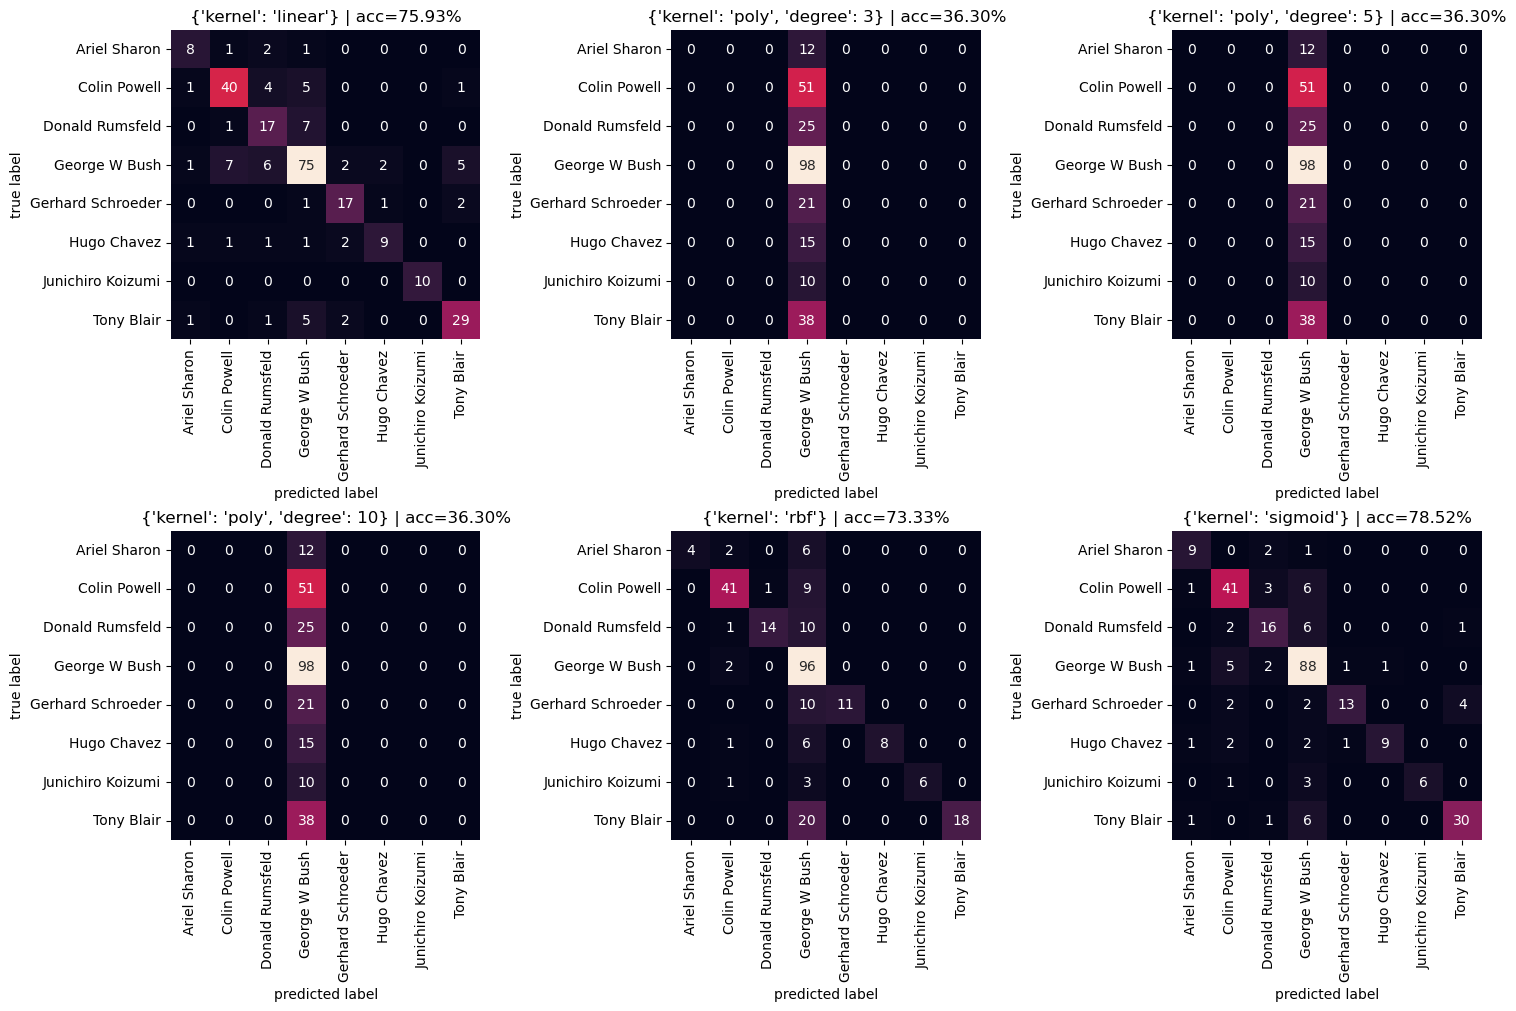

In [10]:
# Apprentissages de classifieurs SVM
def learn_svc(ax, **params):
    clf = sklearn.svm.SVC(**params)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    print(clf.predict(X_test), y_test)
    C = confusion_matrix(y_true=y_test, y_pred=clf.predict(X_test))
    sns.heatmap(C, square=True, annot=True, fmt='d', cbar=False,
        xticklabels=faces.target_names,
        yticklabels=faces.target_names,ax=ax)
    
    ax.set_title(str(params)+ f" | acc={score:.2%}")
    ax.set_xlabel('predicted label')
    ax.set_ylabel('true label')

    return score

fig,ax=plt.subplots(2,3,figsize=(15, 10),constrained_layout=True)
ax=ax.ravel()

print("Linéaire", learn_svc(kernel="linear",ax=ax[0]))
print("Polynome degré 3", learn_svc(kernel="poly", degree=3,ax=ax[1]))
print("Polynome degré 5", learn_svc(kernel="poly", degree=5,ax=ax[2]))
print("Polynome degré 10", learn_svc(kernel="poly", degree=10,ax=ax[3]))
print("rbf", learn_svc(kernel="rbf",ax=ax[4]))
print("sigmoid", learn_svc(kernel="sigmoid",ax=ax[5]))

#fig.tight_layout() 
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(sklearn.svm.SVC(),{'kernel':('linear', 'rbf', 'sigmoid'), 'C':[1, 10, 0.01, 0.1]})
clf.fit(X_test, y_test)

df= pd.DataFrame(clf.cv_results_)
df[[ "params","mean_test_score"]]

,params,mean_test_score
0,"{'C': 1, 'kernel': 'linear'}",0.625926
1,"{'C': 1, 'kernel': 'rbf'}",0.418519
2,"{'C': 1, 'kernel': 'sigmoid'}",0.488889
3,"{'C': 10, 'kernel': 'linear'}",0.625926
4,"{'C': 10, 'kernel': 'rbf'}",0.533333
5,"{'C': 10, 'kernel': 'sigmoid'}",0.518519
6,"{'C': 0.01, 'kernel': 'linear'}",0.585185
7,"{'C': 0.01, 'kernel': 'rbf'}",0.362963
8,"{'C': 0.01, 'kernel': 'sigmoid'}",0.362963
9,"{'C': 0.1, 'kernel': 'linear'}",0.625926
